#### This notebook is used to compare the results from the potential SL pairs as predicted from the siRNA resource and the crispr resource. Contact: gqin@systemsbiology.org

In [2]:
import pandas as pd

In [1]:
Result_dir = "../Results/"

In [107]:
siRNA_dep = pd.read_csv(Result_dir+"driver_gene_mutation_dependency_siRNA_panCancer_withFDR.csv", index_col = ['Unnamed: 0'])
crispr_dep = pd.read_csv(Result_dir+"driver_gene_mutation_dependency_crispr_panCancer_withFDR.csv", index_col = ['Unnamed: 0'])

/Users/gloria/.pyenv/versions/3.7.7/envs/3.7.7-incov/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [109]:
#### Formating siRNA_dep data
G_kd_list = []
for g in siRNA_dep['Gene_kd']:
    G_kd_list.append(g.split(' ')[0])
siRNA_dep['Gene_kd'] = G_kd_list

In [110]:
siRNA_dep['source'] = 'siRNA'
crispr_dep['source'] = 'crispr'
comb = pd.concat([crispr_dep,siRNA_dep], axis = 0)

In [113]:
comb_sig = comb.loc[comb['FDR'] < 0.1]
comb_sig = comb_sig.loc[comb_sig['ES'] < 0]

In [115]:
#compare the number of dependece using different techiques

Gene_list = list(set(comb_sig['Gene_mut']))
Num_SL_crispr = []
Num_SL_siRNA = []

for gene in Gene_list:
    df_gene_sele = comb_sig.loc[comb_sig['Gene_mut'] == gene]
    Num_SL_crispr.append(df_gene_sele.loc[df_gene_sele['source'] == 'crispr'].shape[0])
    Num_SL_siRNA.append(df_gene_sele.loc[df_gene_sele['source'] == 'siRNA'].shape[0])

Num_compare_crispr_siRNA = pd.DataFrame({'Gene_mut':Gene_list, 'crispr_result':Num_SL_crispr, 'siRNA_result':Num_SL_siRNA})
Num_compare_crispr_siRNA_sns = pd.DataFrame({'Gene_mut':Gene_list+Gene_list, 
                                             'Count':Num_SL_crispr + Num_SL_siRNA, 
                                             'source':['crispr']*len(Gene_list) + ['siRNA']*len(Gene_list)})


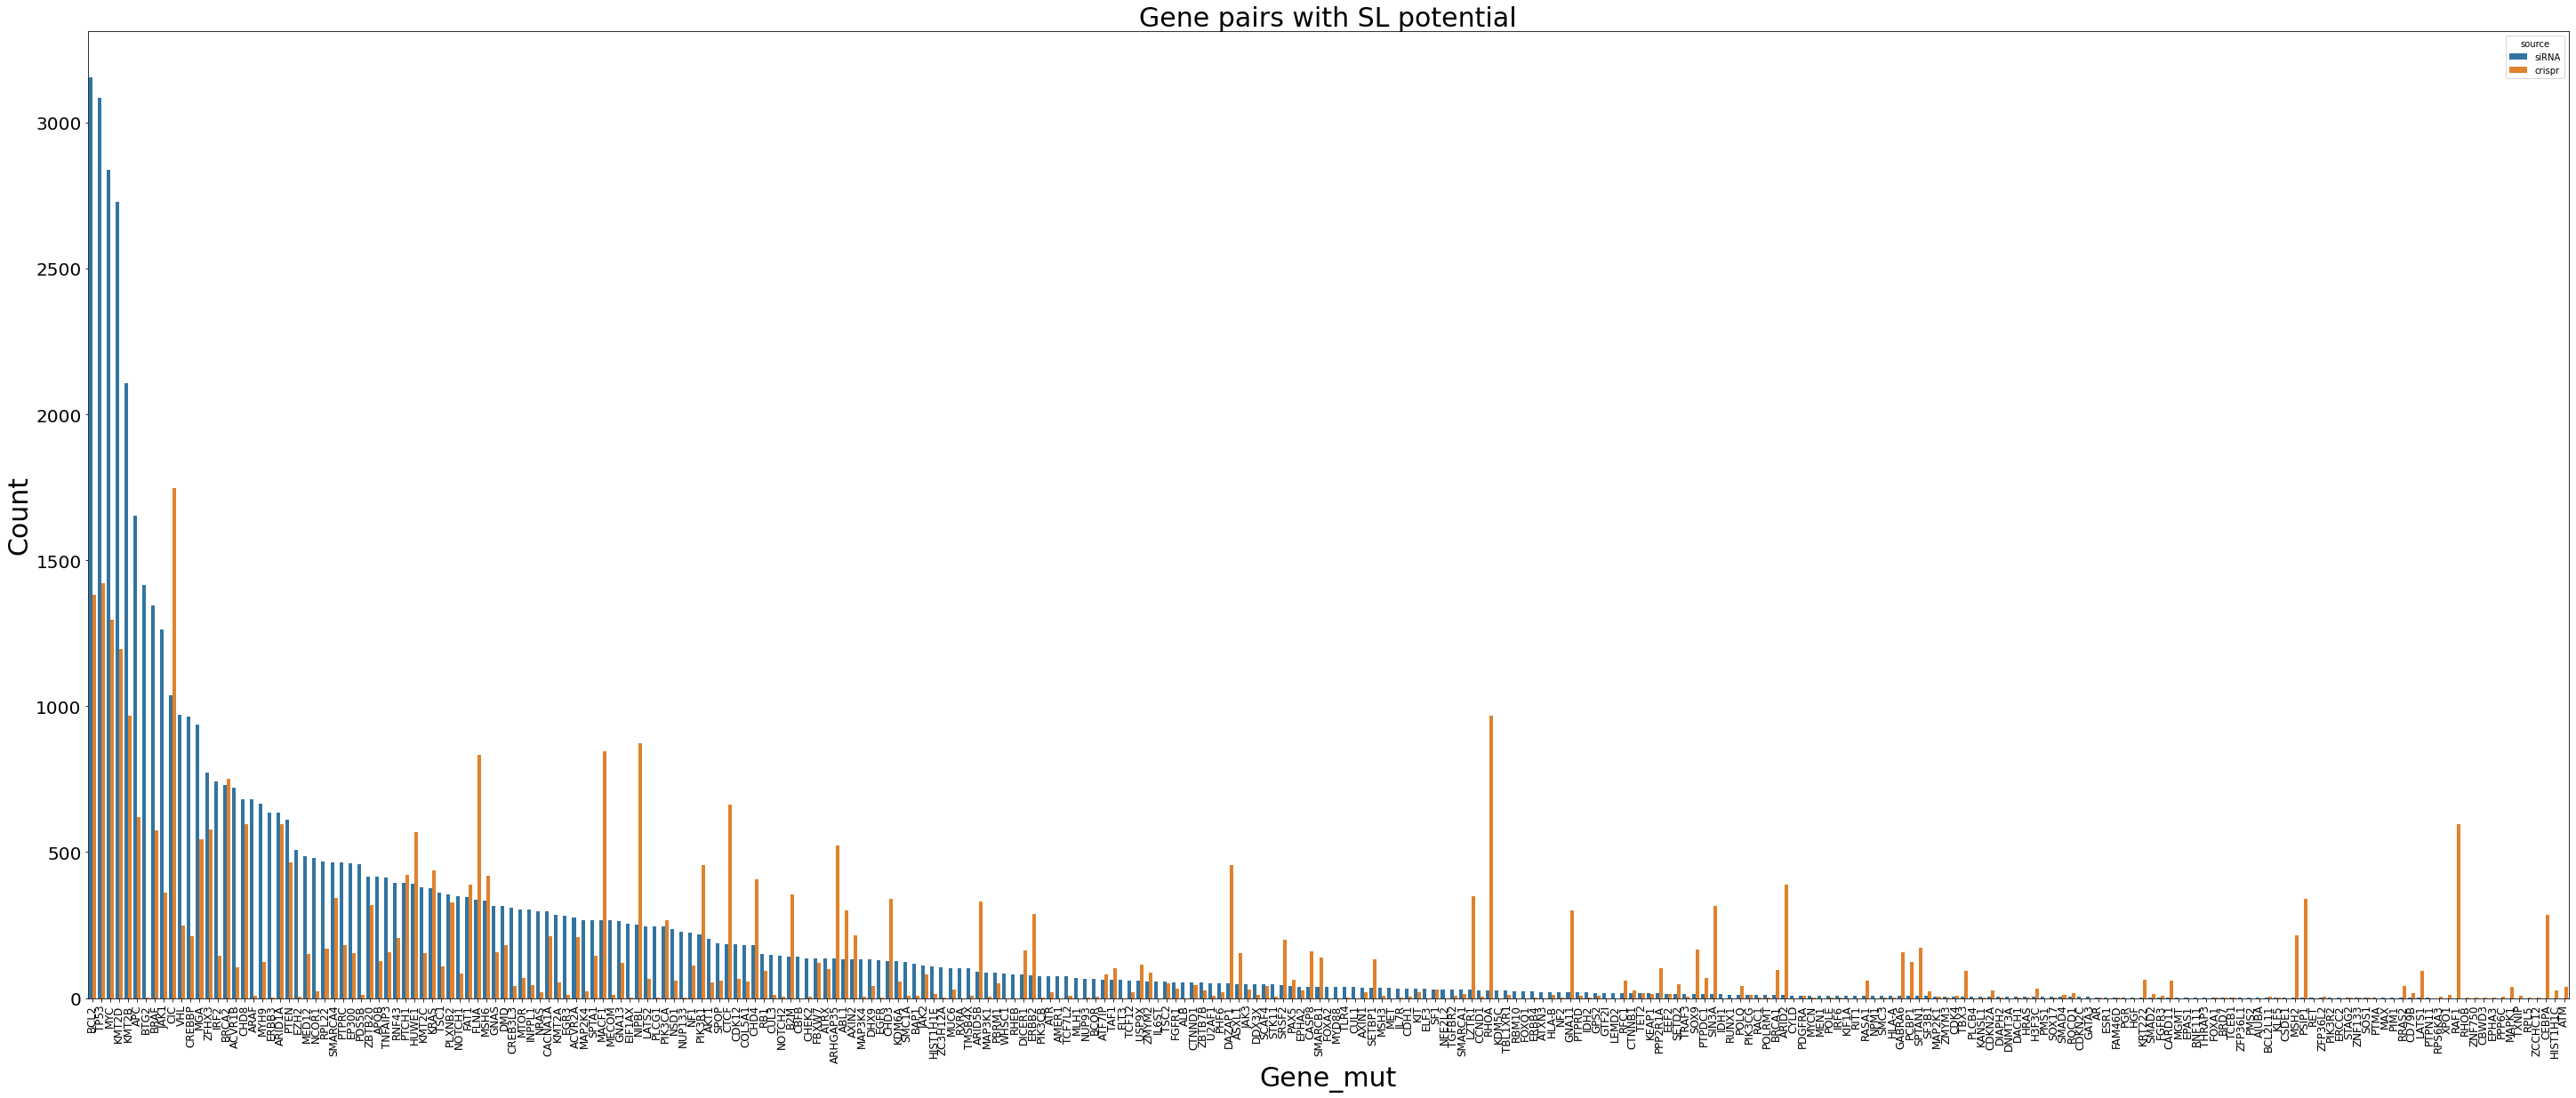

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(50,20))
ax = sns.barplot(x="Gene_mut", 
                 y="Count", 
                 hue="source", 
                 data=Num_compare_crispr_siRNA_sns.sort_values(by = ['source','Count'], ascending = False))
ax.set_title('Gene pairs with SL potential',fontsize= 30) # title of plot
#ax.set_xticklabels(rotation=90)
ax.set_ylabel('Count',fontsize = 30) 
ax.set_xlabel('Gene_mut',fontsize = 30) 
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 12)

plt.xticks(rotation=90)


plt.show()

In [201]:
data = Num_compare_crispr_siRNA
data['siRNA-crispr-substraction'] = data['siRNA_result'] - data['crispr_result']
data['siRNA-crispr-ratio'] = data['siRNA_result'] / data['crispr_result']
data.to_csv("siRNA-crispr-ratio-result-compare.csv")


In [196]:
#### analyze the potential SL pairs for BRCA2 mutation in different confidence and resources
Result = pd.DataFrame()

for FDR_level in [0.01, 0.05, 0.1]: 
    BRCA2_df = comb.loc[comb['Gene_mut'] == 'BRCA2']
    BRCA2_df_sig = BRCA2_df.loc[BRCA2_df['FDR'] < FDR_level]
    BRCA2_df_sig = BRCA2_df_sig.loc[BRCA2_df_sig['ES'] < 0]
    
    sele_list = list(set(BRCA2_df_sig.loc[BRCA2_df_sig['source'] == 'siRNA']['Gene_kd']).intersection(set(BRCA2_df_sig.loc[BRCA2_df_sig['source'] == 'crispr']['Gene_kd'])))
    P_level = [str(FDR_level)]*len(sele_list)
    evidence = ['both']*len(sele_list)
    
    Result_temp1 = pd.DataFrame({'SL_gene':sele_list, 'P_level':P_level, 'evidence':evidence})
    
    
    sele_list = list(set(BRCA2_df_sig.loc[BRCA2_df_sig['source'] == 'siRNA']['Gene_kd']))
    P_level = [str(FDR_level)]*len(sele_list)
    evidence = ['siRNA']*len(sele_list)
    
    Result_temp2 = pd.DataFrame({'SL_gene':sele_list, 'P_level':P_level, 'evidence':evidence})
    
    sele_list = list(set(BRCA2_df_sig.loc[BRCA2_df_sig['source'] == 'crispr']['Gene_kd']))
    P_level = [str(FDR_level)]*len(sele_list)
    evidence = ['crispr']*len(sele_list)
    
    Result_temp3 = pd.DataFrame({'SL_gene':sele_list, 'P_level':P_level, 'evidence':evidence})
    Result = pd.concat([Result,Result_temp1, Result_temp2, Result_temp3 ], axis = 0)
    

In [184]:
Result.to_csv("BRCA.result.csv")